# Neural Network Classification

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras import models, layers

# Data Understanding

**1. Import data**

In [2]:
data=sns.load_dataset('iris')

**2. Data Dimension and Feature**

In [3]:
display(data.shape)
display(data.info())
data.head()

(150, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


None

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Data Exploration

Data exploration is a crucial step in the data analysis process where analysts or data scientists examine and investigate data to understand its characteristics, patterns, and relationships. This exploration is typically performed before applying any formal statistical techniques or building predictive models. In This project The data exploration that will be done are :

- Duplicate Rows.
- Missing Value.
- Univariate Analysis.
- Class Distribution (Target Variable).
- Bivariate Analysis.


**1. Duplicate rows**

Detecting and managing duplicate rows is crucial as they can distort analysis results and lead to incorrect conclusions. These duplicates may arise due to data entry errors, system glitches, or other issues, and if left unaddressed, they can bias statistical analyses and modeling efforts. Therefore, identifying and removing duplicate rows is essential to ensure the accuracy and reliability of subsequent analyses and modeling tasks.

In [4]:
print (f" duplicated rows {data.duplicated().sum()}")
data=data.drop_duplicates()
print (f" duplicated rows {data.duplicated().sum()}")

 duplicated rows 1
 duplicated rows 0


**2. Missing Values**

Addressing missing values is urgent as they can significantly impact the validity of data analysis and modeling outcomes. Missing values can introduce bias, reduce statistical power, and affect the performance of predictive models. Failure to handle missing values appropriately can lead to erroneous conclusions and flawed decision-making. Therefore, it is crucial to identify and address missing values through imputation or deletion to maintain data integrity and ensure the reliability of analytical results.

In [5]:
missing=(data.isnull().sum()/len(data)*100).reset_index().sort_values(by=0,ascending=False)
missing.rename({"index":"column",0:"percentage"},axis=1,inplace=True)
missing

,column,percentage
0,sepal_length,0.0
1,sepal_width,0.0
2,petal_length,0.0
3,petal_width,0.0
4,species,0.0


**3. Class Distribution**

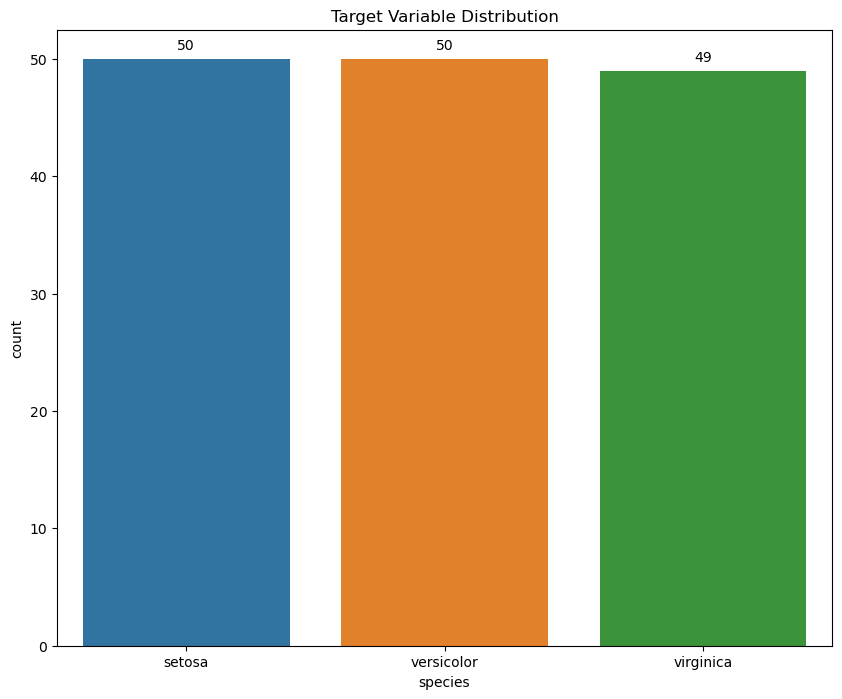

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))

bar=data[["species"]].value_counts().reset_index()
sns.barplot(data=bar, x="species", y="count", ax=ax)
ax.set_title('Target Variable Distribution')
ax.set_ylabel("count")
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

In [7]:
label_encoder = LabelEncoder()
data["species"] = label_encoder.fit_transform(data["species"])

# Data Preprocessing 

**1. Encoding**

the target feature species is encoded for modelling

In [ ]:
label_encoder = LabelEncoder()
data["species"] = label_encoder.fit_transform(data["species"])

**2. Splitting the Data Into Train and Test**

The dataset is splitted into 2 parts and done with stratified method, the 80% of the dataset will be used to train models while the other 20% will be used to evaluate model's performance on new data. Splitting the dataset is important to prevent overfitting.

In [9]:
data_train, data_test = train_test_split(data, test_size=0.2,random_state=42,stratify=data["species"])

X_train=data_train.drop(["species"],axis=1)
y_train=data_train["species"]

X_test=data_test.drop(["species"],axis=1)
y_test=data_test["species"]

# Modelling

In [10]:
# Define the model architecture
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(4,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [11]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50


3/3 [==============================] - 1s 128ms/step - loss: 1.7795 - accuracy: 0.3263 - val_loss: 1.3638 - val_accuracy: 0.3750
Epoch 2/50
3/3 [==============================] - 0s 20ms/step - loss: 1.3021 - accuracy: 0.3263 - val_loss: 1.0877 - val_accuracy: 0.3750
Epoch 3/50
3/3 [==============================] - 0s 21ms/step - loss: 1.0550 - accuracy: 0.4526 - val_loss: 0.9771 - val_accuracy: 0.6250
Epoch 4/50
3/3 [==============================] - 0s 22ms/step - loss: 0.9776 - accuracy: 0.5368 - val_loss: 0.9451 - val_accuracy: 0.4167
Epoch 5/50
3/3 [==============================] - 0s 22ms/step - loss: 0.9373 - accuracy: 0.4105 - val_loss: 0.9155 - val_accuracy: 0.3750
Epoch 6/50
3/3 [==============================] - 0s 24ms/step - loss: 0.9029 - accuracy: 0.4632 - val_loss: 0.8741 - val_accuracy: 0.5417
Epoch 7/50
3/3 [==============================] - 0s 21ms/step - loss: 0.8588 - accuracy: 0.5579 - val_loss: 0.8243 - val_accuracy: 0.7083
Epoch 8/50
3/3 [========

In [12]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

1/1 [==============================] - 0s 33ms/step - loss: 0.2643 - accuracy: 0.9667
Test Accuracy: 0.9666666388511658


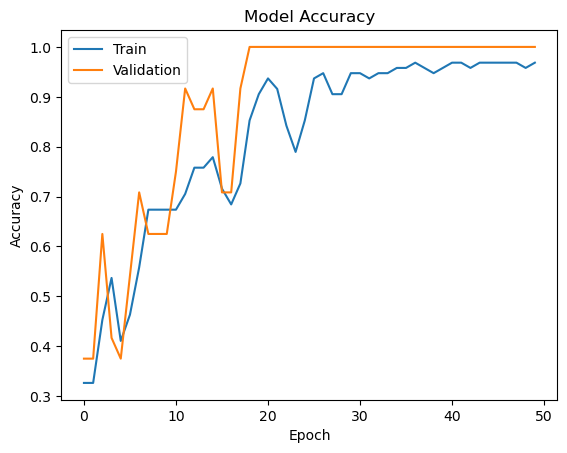

In [13]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()